# Google Drive Setup

In [1]:
from google.colab import drive

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)    

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Navigate to Working Directory

In [96]:
cd /content/drive/My\ Drive/Masters/Deep\ Learning/model_evaluator/model_evaluator

/content/drive/My Drive/Masters/Deep Learning/model_evaluator/model_evaluator


# Model Evaluator Class

TODO:

1. Add model_training_class which stores the model_state_dict - Done
2. Add methods to store and retrive the information - Done
3. Add methods to print the information
4. Add methods to visualize between the models
5. Statements to deal with empty dictionary if it exists - list models, retreive loss over
6. Solidify and Covey the rigidity of the structure of dictionary i.e validate if the train_dict will fit the structure of the class

In [0]:
class ModelEvaluator:

  def __init__(self,dataset,file_path):
    self.dataset = dataset
    self.file_path = file_path
    try:
      self.models = torch.load(file_path)
    except FileNotFoundError:
      self.models = {}

  def load_model(self,file_path):
    try:
      self.models = torch.load(file_path)
    except FileNotFoundError:
      self.models = {}
    
  def add_model(self,model_name,model_dict):
    if model in self.models:
      print('model already exists')
      pass
    else:
        self.models[model_name] = model_dict
        torch.save(self.models,self.file_path)

  def list_models(self):
    for model_name in self.models.keys():
      print(model_name)

  def reset_experiment(self):
    """
    Empties the experiment file.
    1. Delete the file
    """
    os.remove(self.file_path)

  def retreive_loss_over(self,model_name):
    return self.models[model_name]['training_stats']['epoch_average_batch_loss']
      

# Dataset Download

In [0]:
#building a network
from torch import nn,optim
import torch.nn.functional as F
import datetime
import os
import cv2

In [0]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

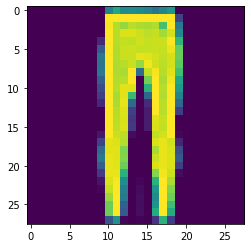

In [100]:
import matplotlib.pyplot as plt
images,label = next(iter(trainloader))
plt.imshow(images[0].numpy().squeeze())

# Training Process and Dictionary Filling

In [0]:
def train_model(epochs,train_loader,model,criterion,optimizer,device = 'cpu',print_time_stats=True):
  model_architecture = {'model':str(model),'optimizer':optimizer,'critierion':criterion}
  data = {'train_set':str(trainset)}
  training_parameters = {'no_of_steps_per_epoch':len(train_loader),'device':device,'epochs':epochs,'time':str(datetime.datetime.now())}
  training_stats = {'total_train_time':None,'epoch_time':[],'epoch_average_batch_loss':[]}
  model_dict = {'model_architecture':model_architecture,'data':data,'training_parameters':training_parameters,'training_stats':training_stats}

  train_start_time = datetime.datetime.now()
  model.train()
  for e in range(epochs):
    epoch_start_time = datetime.datetime.now()
    running_loss = 0
    for images,labels in train_loader:
      if device != 'cpu':
        images, labels = images.cuda(),labels.cuda()
      images = images.view(-1,28*28)
      optimizer.zero_grad()
      output = model(images)
      loss = criterion(output,labels)
      loss.backward()
      optimizer.step()
      running_loss += loss
    print(f"Average Loss per Batch : {running_loss/len(train_loader)}")
    model_dict['training_stats']['epoch_average_batch_loss'].append(running_loss.item()/len(train_loader))
    epoch_end_time = datetime.datetime.now()
    model_dict['training_stats']['epoch_time'].append(str(epoch_end_time - epoch_start_time))
    if print_time_stats:
      print(f"Epoch Time : {epoch_end_time - epoch_start_time}")
  train_end_time = datetime.datetime.now()
  model_dict['training_stats']['total_train_time'] = str(train_end_time - train_start_time)
  if print_time_stats:
    print(f"Training Time : {str(train_end_time - train_start_time)}")
  return model_dict

In [106]:
model = nn.Sequential(
                    nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,32),
                    nn.ReLU(),
                    nn.Linear(32,10),
                    nn.LogSoftmax(dim=1)
)
#defining the loss
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)
model_train_dict = train_model(5,trainloader,model,criterion,optimizer)

Average Loss per Batch : 0.5415927767753601
Epoch Time : 0:00:10.312711
Average Loss per Batch : 0.4368908405303955
Epoch Time : 0:00:10.551300
Average Loss per Batch : 0.41435903310775757
Epoch Time : 0:00:10.754765
Average Loss per Batch : 0.39395079016685486
Epoch Time : 0:00:10.778592
Average Loss per Batch : 0.3892238140106201
Epoch Time : 0:00:10.795369
Training Time : 0:00:53.193113


In [0]:
path = "/content/drive/My Drive/Masters/Deep Learning/model_evaluator/model_evaluator/fashion_mnist_test.pkl"
fashion_mnist = ModelEvaluator('fashion_mnist',path)

In [0]:
fashion_mnist.reset_experiment()

In [0]:
fashion_mnist.add_model('fashion_mnist_2',model_train_dict)
fashion_mnist.add_model('fashion_mnist_1',model_train_dict)

In [110]:
fashion_mnist.list_models()

fashion_mnist_1
fashion_mnist_2


In [111]:
fashion_mnist.models['fashion_mnist_2']

{'data': {'train_set': 'Dataset FashionMNIST\n    Number of datapoints: 60000\n    Root location: /root/.pytorch/F_MNIST_data/\n    Split: Train\n    StandardTransform\nTransform: Compose(\n               ToTensor()\n               Normalize(mean=(0.5,), std=(0.5,))\n           )'},
 'model_architecture': {'critierion': NLLLoss(),
  'model': 'Sequential(\n  (0): Linear(in_features=784, out_features=128, bias=True)\n  (1): ReLU()\n  (2): Linear(in_features=128, out_features=32, bias=True)\n  (3): ReLU()\n  (4): Linear(in_features=32, out_features=10, bias=True)\n  (5): LogSoftmax()\n)',
  'optimizer': Adam (
  Parameter Group 0
      amsgrad: False
      betas: (0.9, 0.999)
      eps: 1e-08
      lr: 0.01
      weight_decay: 0
  )},
 'training_parameters': {'device': 'cpu',
  'epochs': 5,
  'no_of_steps_per_epoch': 938,
  'time': '2020-05-10 15:52:18.216440'},
 'training_stats': {'epoch_average_batch_loss': [0.5415927586016624,
   0.43689085222256463,
   0.41435902154267723,
   0.393950